# <span style="color:cyan;">Lead Score Case Study</span>

In [252]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lead-score-data-set/Leads.csv
/kaggle/input/lead-score-data-set/Leads Data Dictionary.xlsx
/kaggle/input/question-to-be-answered/Assignment Subjective Questions.docx


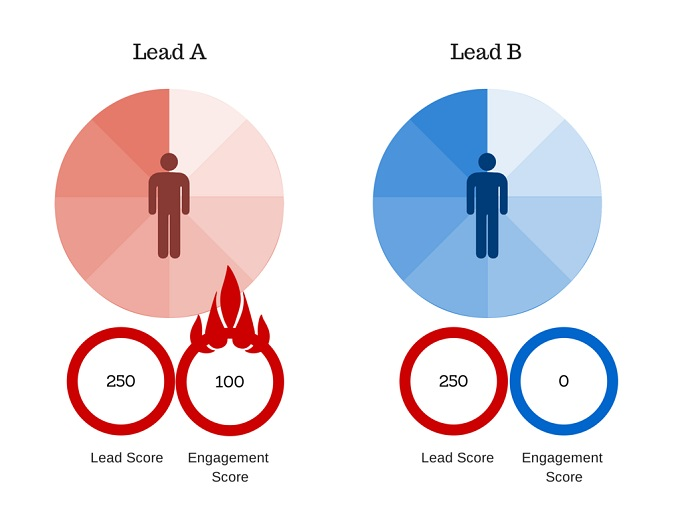
<cite>https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.bigcommerce.com%2Fblog%2Flead-scoring%2F&psig=AOvVaw2-rsvXcfMx11qBcw7Y4yCC&ust=1702665346598000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCICn9P_Sj4MDFQAAAAAdAAAAABAD</cite>

# <span style="color:skyblue;">Problem Statement</span>

<div style="font-size:20px;color:white;">An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
    
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
 
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:</div>

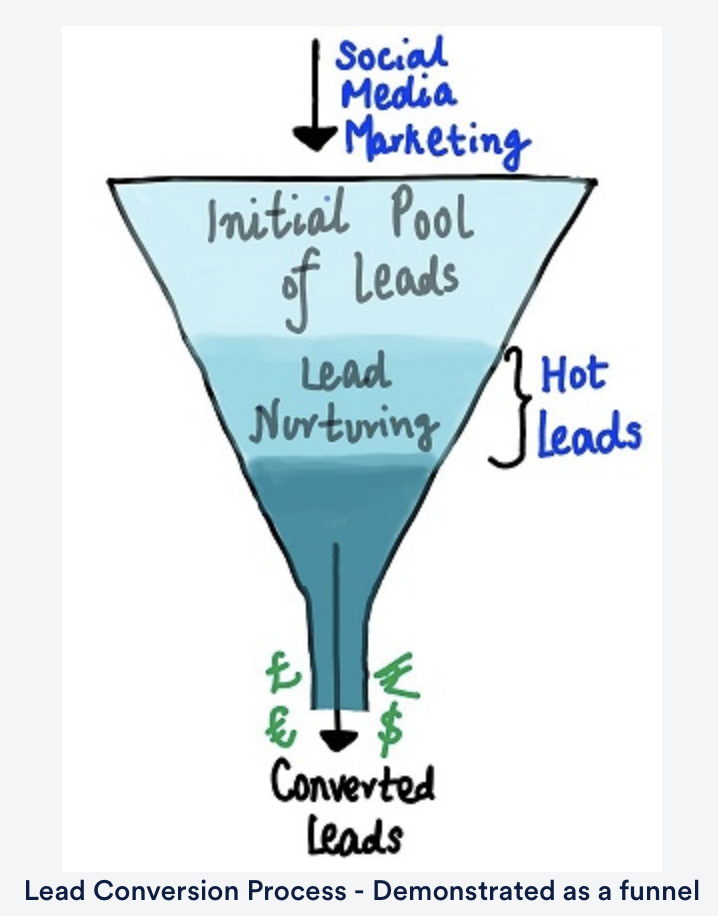

<div style="font-size:20px;color:white;">As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.
 
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.</div>

# <span style="color:skyblue;">Data</span>

<span style="color:white;font-size:20px;">You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).</span>

# <span style="color:skyblue;">Goals of the Case Study</span>

<div style="color:white;font-size:20px;">There are quite a few goals for this case study:
<ul><li>Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.</li>
<li>There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.</li></div>

In [253]:
# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')


In [254]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [255]:
# loading dataset
leads_data=pd.read_csv("/kaggle/input/lead-score-data-set/Leads.csv")
leads_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

# <span style="color:skyblue;">Step 1: Data Quality Check</span>

In [256]:
# Checking the shape of Dataset
leads_data.shape

(9240, 37)

Dataset has 37 variables (columns) and 9240 Records (Rows)

In [257]:
# Overview of Datatypes and column names
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [258]:
# Checking Description of data.
leads_data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [259]:
# Checking Nulls
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [260]:
# collecting all columns having null values to work with
null_counts = leads_data.isnull().sum()

col_list = [(col, count) for col, count in null_counts.items() if count > 0]
null_col_list = pd.DataFrame(col_list)

print("Column name list with null values")
print(null_col_list,"\n")
print("Shape of null_col_list", null_col_list.shape)

Column name list with null values
                                                0     1
0                                     Lead Source    36
1                                     TotalVisits   137
2                            Page Views Per Visit   137
3                                   Last Activity   103
4                                         Country  2461
5                                  Specialization  1438
6              How did you hear about X Education  2207
7                 What is your current occupation  2690
8   What matters most to you in choosing a course  2709
9                                            Tags  3353
10                                   Lead Quality  4767
11                                   Lead Profile  2709
12                                           City  1420
13                    Asymmetrique Activity Index  4218
14                     Asymmetrique Profile Index  4218
15                    Asymmetrique Activity Score  4218
16            

we have 17 columns with null values , where many columns having nulls greater than 30% , which is 9240*0.3= 2772.

# <span style="color:skyblue;">Step 2: Data Preperation ( Cleaning and Resolving Issues)</span>

**As we saw above , we have so many columns having more than 30% null values, Therefore these columns will be not be so useful in our analysis. so we will delecte those columns, along with that we also delete "Lead Number :A lead number assigned to each lead procured." and "Prospect ID: A unique ID with which the customer is identified." , which are like an index number **

In [261]:
# Droping all the columns having nulls more than 30% 
for var in leads_data.columns:
    if leads_data[var].isnull().sum()>((leads_data.shape[0])*0.3):
        leads_data.drop(var, axis=1,inplace=True)
        
print("New shape of data",leads_data.shape)
print("\n\n")


New shape of data (9240, 31)





In [262]:
# Droping "Lead Number" and "Prospect ID"

leads_data.drop(['Lead Number','Prospect ID'],axis=1 , inplace = True)
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [263]:
# Checking value counts in each column

for var in leads_data.columns:
    print(leads_data[var].value_counts(dropna=False))
    print("\n")
    for x in range(15):
        print("-",end='')
    print("\n")

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


---------------

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64


---------------

Do Not Email
No     8506
Yes     734
Name: count, dtype: int64


---------------

Do Not Call
No     9238
Yes       2
Name: count, dtype: int64


--------

<span style="font-size:18px;">$$\text{Variable Count Visual}$$</span>
- 

In [264]:
# plt.figure(figsize=(5,6))
# sns.countplot(leads_data['Lead Source'])

# sns.countplot(x='category', data=df)

# plt.figure(figsize=(15(width),10(height)))
# plt.subplot(16(Row),2(Col),fig(fig number))


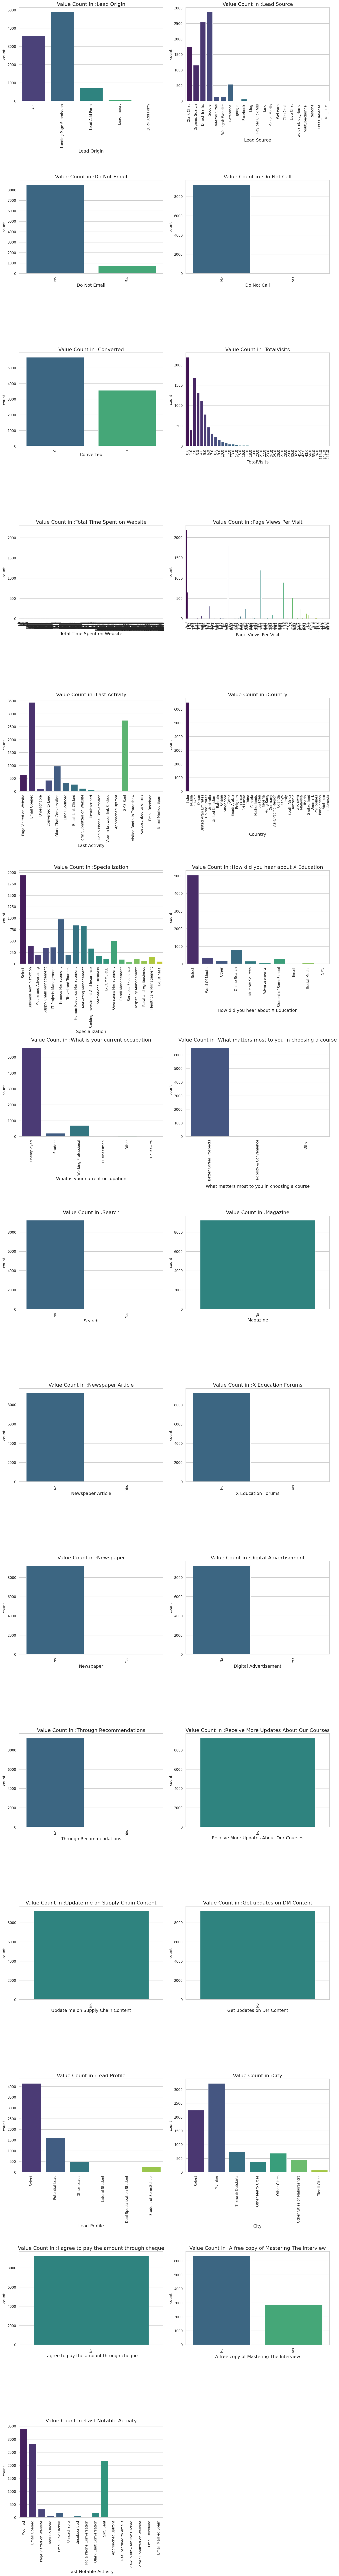

In [265]:
# Created function to Draw Countplots
def countplot(var,fig):
    plt.subplot(16,2,fig)
    sns.countplot(x = var, data = leads_data, palette = 'viridis')
    plt.title("Value Count in :"+''+ var, size = 16)
    plt.xlabel(var, size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,120))

# loop for drawing countplot for each variable
c = 1
for var in leads_data.columns:
    countplot(var, c)
    c += 1
    plt.tight_layout()


<span style="font-size:16px;">Inference From Visualization</span>

- <span style="color:#FFD700;">Lead Origin :</span> Distribution of values looks okay. 
- <span style="color:#FFD700;">Lead Source :</span>  Distribution of values looks okay.
- <span style="color:#FFD700;">Do Not Email :</span> More than 90% is 'No'. Can be Dropped
- <span style="color:#FFD700;">Do Not Call :</span>  Almost all values are 'No'. can be Dropped
- <span style="color:#FFD700;">Converted :</span>  This is our target variable, value distribution Normal, No Class imbalance, Approximately 62% 'No' and 38% 'Yes'.
- <span style="color:#FFD700;">TotalVisits :</span>  Distribution is Right-Skewed, need to be looked.
- <span style="color:#FFD700;">Total Time Spent on Website :</span> Need to be looked
- <span style="color:#FFD700;">Page Views Per Visit :</span> Distribution is Right-Skewed , need to be looked.
- <span style="color:#FFD700;">Last Activity :</span>  Need to be looked.
- <span style="color:#FFD700;">Country :</span>  More than 70% records ahving value 'India' , more than 25% records having Nulls, and rest are  Negligible, hence Can be Dropped.
- <span style="color:#FFD700;">Specialization :</span>  Maximum rows have value 'Select', this implies that user have not seleceted any specialization. but rest values are normally distributed, so need to be looked.
- <span style="color:#FFD700;">How did you hear about X Education :</span>  Approximately 55% values are 'Select' i.e user have'nt selected any value, which is equivalent to Null/missing value.Approximately 25% are Nulls, therfore total nulls are 80% and rest 20% are normally distributed. Column can be dropped.
- <span style="color:#FFD700;">What is your current occupation :</span> More than 60% Unemployed, More than 27% Nulls, Therefore column can be dropped.
- <span style="color:#FFD700;">What matters most to you in choosing a course :</span> More than 70% have chosen the course to get "Better Carrier Prospects" , More than 28% are Nulls, Therefore column can be Dropped.
- <span style="color:#FFD700;">Search :</span>  Allmost all values are 'No' , column can be Dropped.
- <span style="color:#FFD700;">Magezine :</span>  Allmost all values are 'No' , column can be Dropped.
- <span style="color:#FFD700;">Newspaper Article :</span>  Allmost all values are 'No' , column can be Dropped.
- <span style="color:#FFD700;">X Education Forums :</span>  Allmost all values are 'No' , column can be Dropped.
- <span style="color:#FFD700;">Newspaper :</span>   Allmost all values are 'No' , column can be Dropped.
- <span style="color:#FFD700;">Digital Advertisement :</span>  Allmost all values are 'No' , column can be Dropped.
- <span style="color:#FFD700;">Through Recommendations :</span>  Allmost all values are 'No' , column can be Dropped.
- <span style="color:#FFD700;">Receive More Updates About Our Courses :</span>  Allmost all values are 'No' , column can be Dropped.
- <span style="color:#FFD700;">Update me on Supply Chain Content :</span>   Allmost all values are 'No' , column can be Dropped.
- <span style="color:#FFD700;">Get updates on DM Content :</span>  Allmost all values are 'No' , column can be Dropped.
- <span style="color:#FFD700;">Lead Profile :</span>  Approx 45% records have value 'Select' and 29% are Nulls, but actually 'select' is also equivalent to Nulls as it mans user haven't inpu any value for that column, therefore actually we have more than 74% Nulls, hence , column is Dropped.
- <span style="color:#FFD700;">City :</span> MAximum values are 'Select' and 'Mumbai', may be this column is not mendatory or important to arive at lead scor, Therefore we can Drop this column also.
- <span style="color:#FFD700;">I agree to pay the amount through cheque :</span>  There is only one Value i.e. 'No'. column can be dropped
- <span style="color:#FFD700;">A free copy of Mastering The Interview :</span>  Considerable Variable.
- <span style="color:#FFD700;">Last Notable Activity :</span> Considerable Variable.

In [266]:
# Creating list of Droppable colunms
dropable_col_list = ['Do Not Email','Do Not Call','Country','How did you hear about X Education',
                     'What is your current occupation','What matters most to you in choosing a course',
                     'Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                     'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                     'Update me on Supply Chain Content','Get updates on DM Content','Lead Profile',
                     'City','I agree to pay the amount through cheque']

# Dropping columns identified as droppable in 'dropable_col_list'
for var in dropable_col_list:
    leads_data.drop([var], axis = 1, inplace = True)

In [267]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9137 non-null   object 
 7   Specialization                          7802 non-null   object 
 8   A free copy of Mastering The Interview  9240 non-null   object 
 9   Last Notable Activity                   9240 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 722.0+ KB


In [268]:
leads_data.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization A free copy of Mastering The Interview  \
0                   Select                                     No   
1                   Select                                     No   
2  Business Administration                                    Yes   
3    Media and Advertising                                     No   
4                   Select                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

**Analysisng categorical Variable with target Variable**

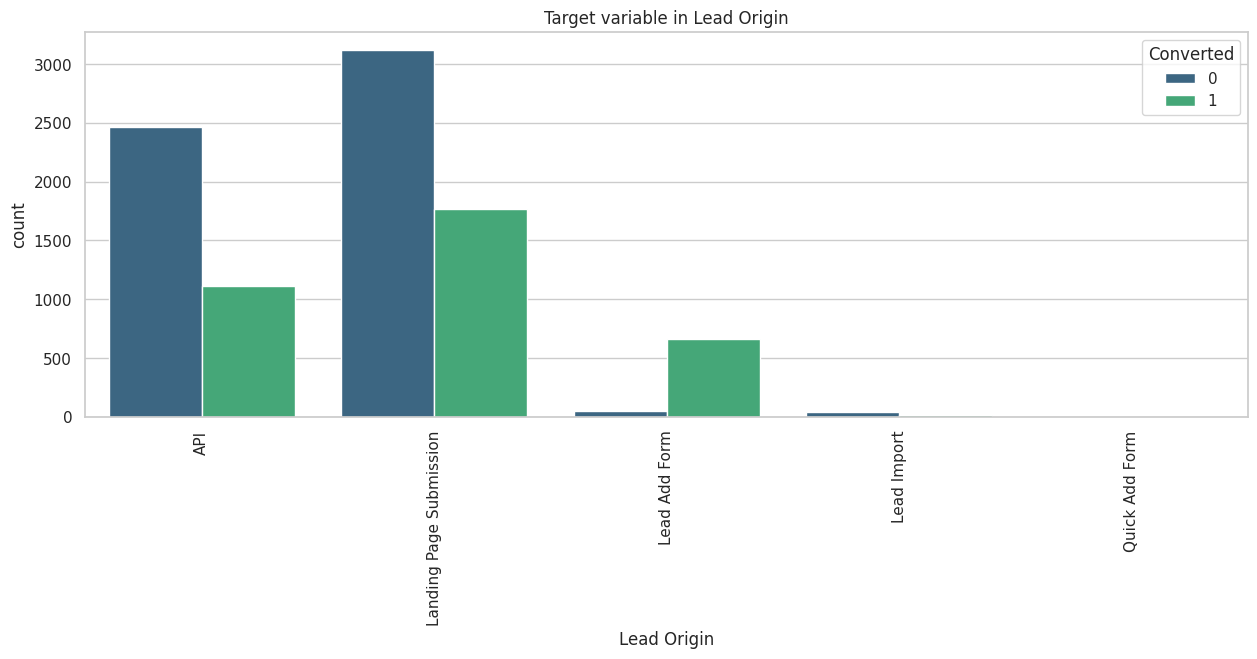

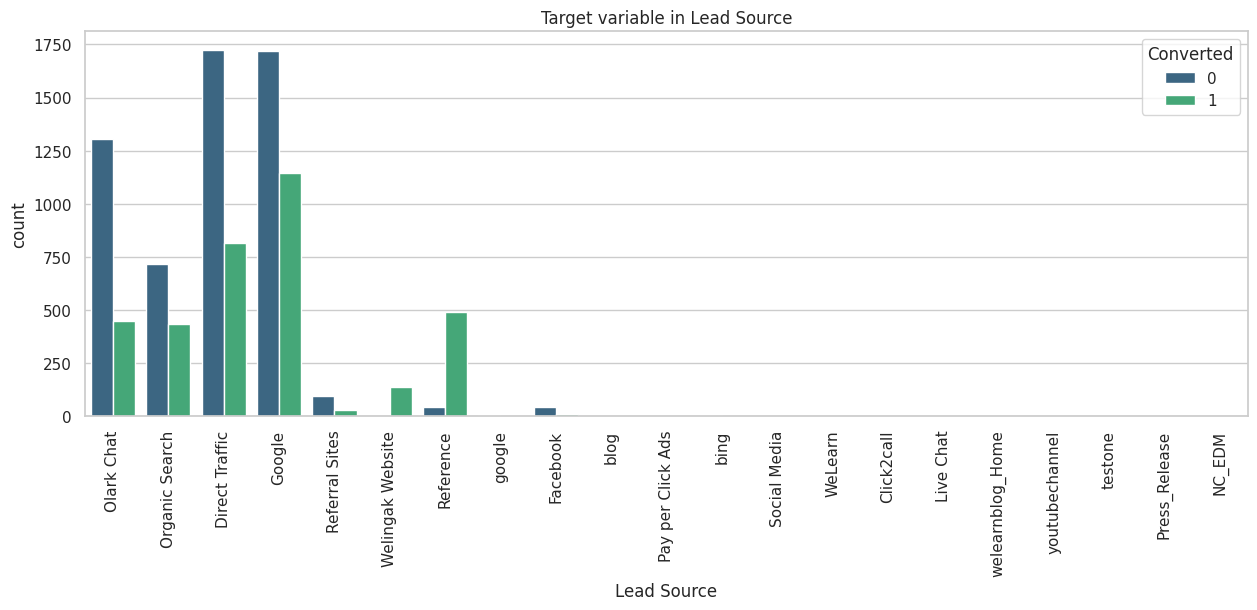

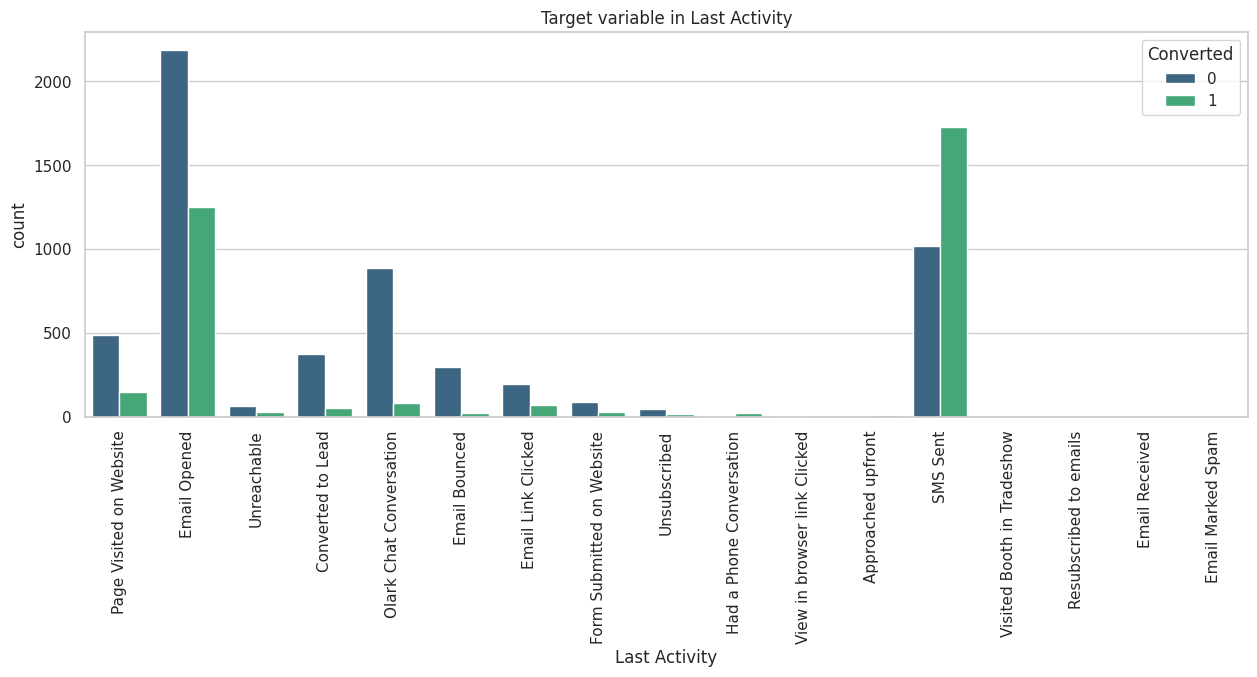

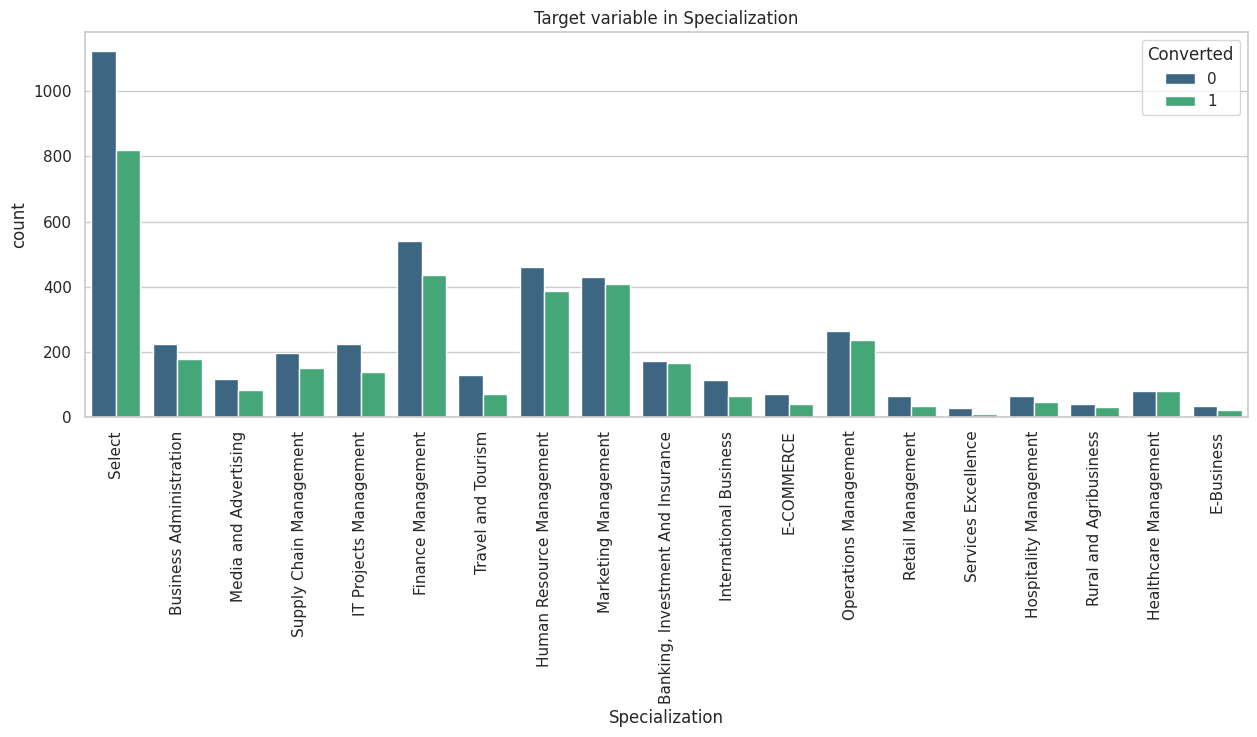

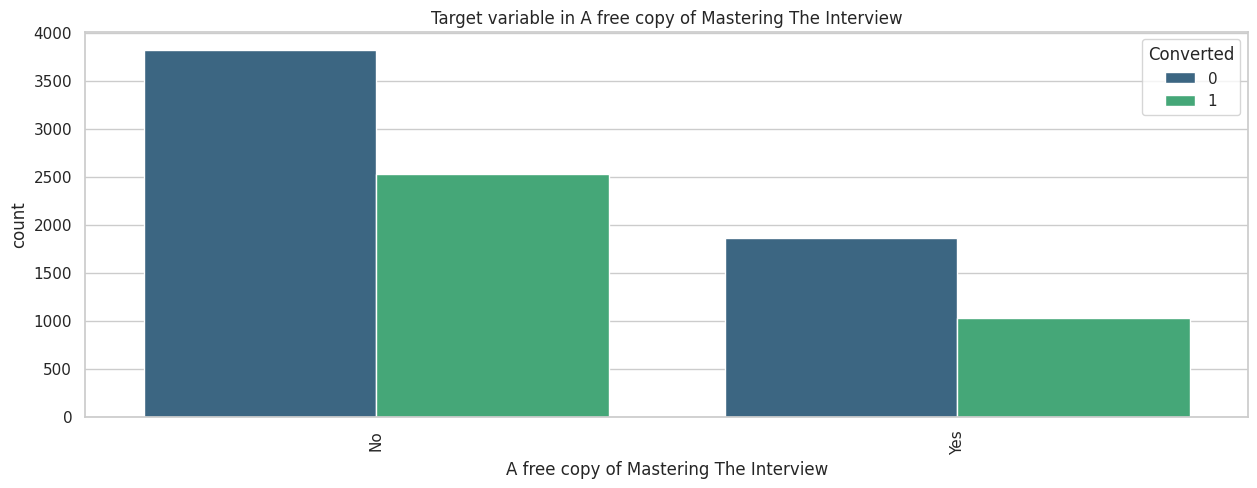

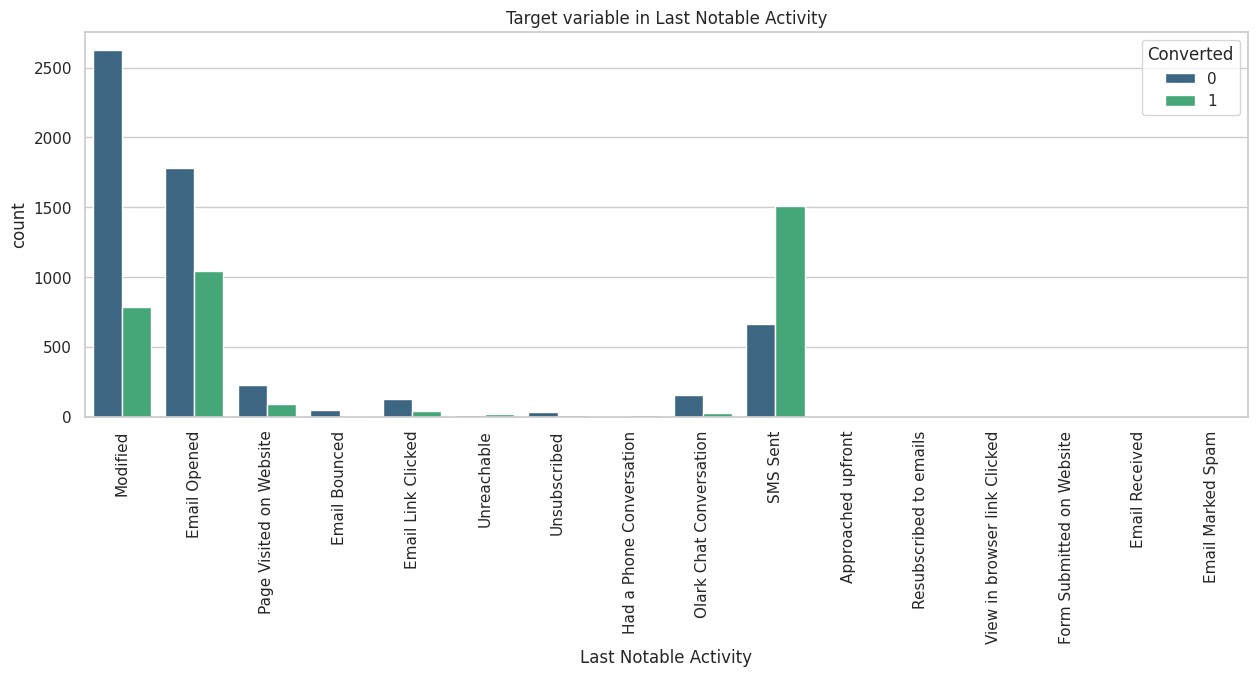

In [269]:
conv = leads_data.select_dtypes(include ="object").columns
for i in conv:
    
    plt.figure(figsize =(15,5))
    sns.countplot(x=leads_data[i], hue=leads_data.Converted, palette ='viridis')
    plt.xticks(rotation = 90)
    plt.title('Target variable in'+' '+ i)
    plt.xlabel(i)
    plt.show()

Performing Further Analysis on Remaining Variable.

<Figure size 2000x1500 with 0 Axes>

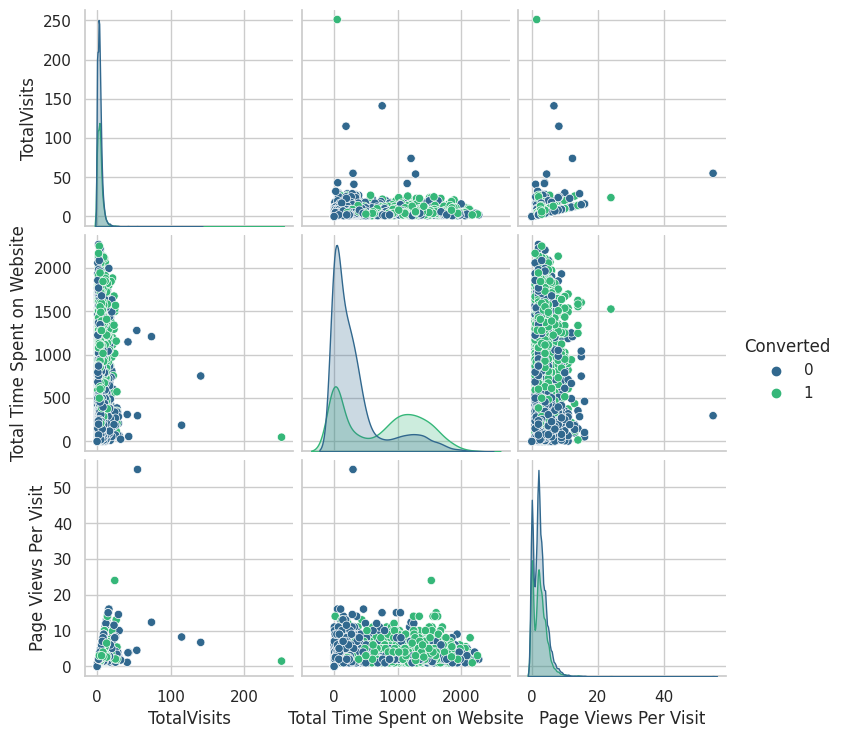

In [270]:
# Visualizing Pairplot
plt.figure(figsize=(20,15))
sns.pairplot(leads_data, diag_kind = 'kde' , hue = 'Converted', palette = 'viridis')
plt.show()

**As it can be Observed here that , the variables are not evenly Distributed (Right Skewed-which is against the assumption) across the Parameters, hence are very close to each other,Therefore we apply Transformation technique to make data evenly distributed. we will use "PowerTransformer" from sklearn as it is helpful in making data more Gaussian-like, useful for modeling Issues related to heterosedasticity (non-constant variance), or other situations where normality is desired.**

In [271]:
# Separating above variables in a Dataframe
num_vars_data = leads_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]

In [272]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()        # Creating Instance/Object of PowerTransformer

transformed_num_vars_data = pd.DataFrame(pt.fit_transform(num_vars_data))     # Coverting the retuened numpy array into a DataFrame and storing it in 'transformed_num_vars_data'.
transformed_num_vars_data.columns = num_vars_data.columns     # To retain original Column names
transformed_num_vars_data.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  Converted
0    -1.457907                    -1.473767             -1.454706  -0.791863
1     0.747918                     0.729628              0.308534  -0.791863
2    -0.141636                     1.306093              0.065574   1.262845
3    -0.640428                     0.264936             -0.536967  -0.791863
4    -0.141636                     1.252499             -0.536967   1.262845

<Figure size 2000x1500 with 0 Axes>

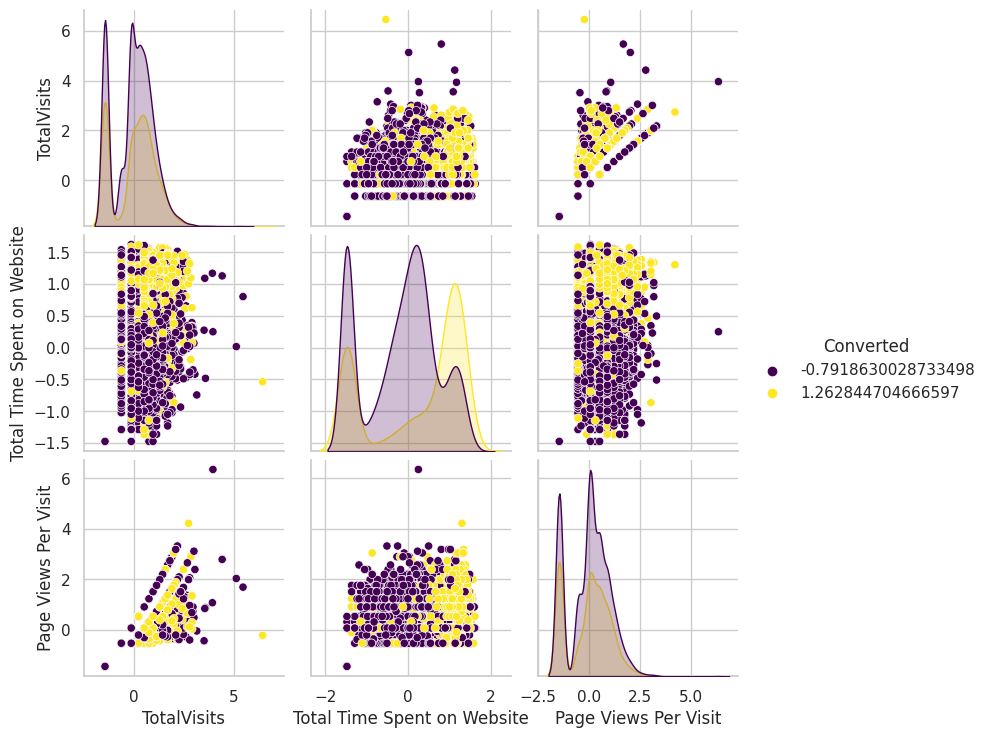

In [273]:
# Creating Pairplot with transformed Data

plt.figure(figsize=(20,15))
sns.pairplot(transformed_num_vars_data, diag_kind = 'kde', hue = 'Converted', palette = 'viridis')
plt.show()

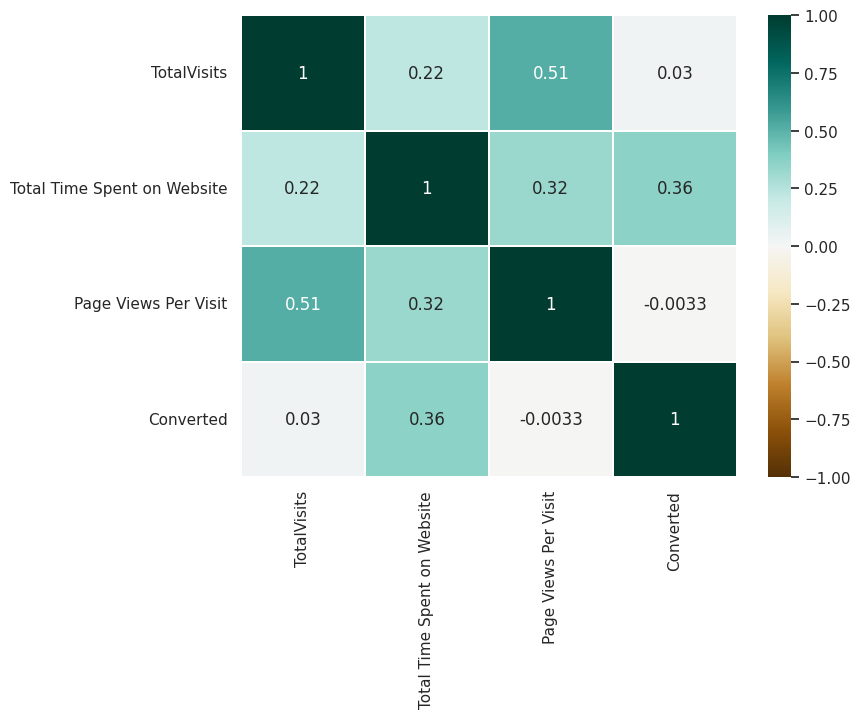

In [274]:
# Observing Correlation
# figure size
plt.figure(figsize=(8,6))

# heatmap
sns.heatmap(num_vars_data.corr(), annot=True,cmap="BrBG", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

In [275]:
# Checking again for Nulls
leads_data.isnull().sum().sort_values(ascending=False)

Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Lead Origin                                  0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

**As we still have a lot off nulls in Specialization, we will drop the entire Record, though it will reduce our sample size, but we will still left with approximately 85% of the current sample size, which is good enough to arrive at some decision.**

In [276]:
# Dropping all Records where Specialization is NUll

leads_data = leads_data[~pd.isnull(leads_data['Specialization'])]

In [277]:
# Checking again for Nulls
leads_data.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Lead Origin                                 0
Converted                                   0
Total Time Spent on Website                 0
Specialization                              0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [278]:
# Dropping Records having TotalVisits = Null
leads_data = leads_data[~pd.isnull(leads_data['TotalVisits'])]

In [279]:
# Checking again for Nulls
leads_data.isnull().sum().sort_values(ascending=False)

Lead Source                               29
Lead Origin                                0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                             0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [280]:
# Dropping Records Having Lead Source = Null

leads_data = leads_data[~pd.isnull(leads_data['Lead Source'])]

In [281]:
# Checking again for Nulls
leads_data.isnull().sum().sort_values(ascending=False)

Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [282]:
# Checking how much portion of sample data we are left with.

print(len(leads_data.columns))
print(len(leads_data.index))
print(len(leads_data.index)/9240)

10
7643
0.8271645021645022


**So we are still left with more than 82% of previous sample data,and 10 variables. it is considerable for analysis.**

In [283]:
leads_data.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization A free copy of Mastering The Interview  \
0                   Select                                     No   
1                   Select                                     No   
2  Business Administration                                    Yes   
3    Media and Advertising                                     No   
4                   Select                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

### <span style="color:skyblue;">Creating Dummy Variable for Categorical Variable</span>

In [284]:
# Extracting Categorical Variables

cat_vars = leads_data.loc[:,leads_data.dtypes == 'object']
cat_vars.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

We have Six Categorical Variables.

In [285]:
cat_vars_list = list(cat_vars.columns)

print(type(cat_vars_list))
print(cat_vars_list)

<class 'list'>
['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [286]:
# Dummy Variable

dummy_vars = pd.get_dummies(leads_data[cat_vars_list], drop_first = True, dtype = 'int')

# Cocating the dummy and master Dataframe
leads_data = pd.concat([leads_data,dummy_vars], axis = 1)

leads_data.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization A free copy of Mastering The Interview  \
0                   Select                                     No   
1                   Select                                     No   
2  Business Administration                                    Yes   
3    Media and Advertising                                     No   
4                   Select                                     No   

  Last Notable Activity  ...  Last Notable Activity_Email Received  \
0              Modified  ...                                     0   
1          Email Opened  ...                                     0   
2          Email Opened  ...                                     0   
3              Modified  ...                                     0   
4              Modified  ...                                     0   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                         

In [287]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7643 entries, 0 to 9239
Data columns (total 81 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Lead Origin                                         7643 non-null   object 
 1   Lead Source                                         7643 non-null   object 
 2   Converted                                           7643 non-null   int64  
 3   TotalVisits                                         7643 non-null   float64
 4   Total Time Spent on Website                         7643 non-null   int64  
 5   Page Views Per Visit                                7643 non-null   float64
 6   Last Activity                                       7643 non-null   object 
 7   Specialization                                      7643 non-null   object 
 8   A free copy of Mastering The Interview              7643 non-null   object 
 9   La

In [288]:
# Dropping Original Columns

leads_data.drop(leads_data[cat_vars_list], axis = 1 , inplace = True)

In [289]:
leads_data

Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                     0.00                                    0   
1                     2.50                                    0   
2                     2.00                                    1   
3                     1.00                                    1   
4                     1.00                                    1   
...                    ...                                  ...   
9235                  2.67                                    1   
9236                  2.00                                    1   
9237                  2.00                                    1   
9238                  3.00                                    1   
9239                  3.00                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
9235                          0                        0   
9236                          0                        0   
9237                          0                        0   
9238                          0                        0   
9239                          0                        0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                              0                     0                   0   
1                              0                     0                   0   
2                              1                     0                   0   
3                              1                     0                   0   
4                              0                     0                   1   
...                          ...                   ...                 ...   
9235                           1                     0                   0   
9236                           1                     0                   0   
9237                           1                     0                   0   
9238                           0                     0                   1   
9239                           1                     0                   0   

      ...  Last Notable Activity_Email Received  \
0     ...                                     0   
1     ...                                     0   
2     ...                                     0   
3     ...                                     0   
4     ...                                     0   
...   ...                                   ...   
9235  ...                                     0   
9236  ...                                     0   
9237  ...                                     0   
9238  ...                                     0   
9239  ...                                     0   

      Last Notable Activity_Form Submitted on Website  \
0                                                   0   
1                                                   0   
2                         

In [290]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7643 entries, 0 to 9239
Data columns (total 75 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Converted                                           7643 non-null   int64  
 1   TotalVisits                                         7643 non-null   float64
 2   Total Time Spent on Website                         7643 non-null   int64  
 3   Page Views Per Visit                                7643 non-null   float64
 4   Lead Origin_Landing Page Submission                 7643 non-null   int64  
 5   Lead Origin_Lead Add Form                           7643 non-null   int64  
 6   Lead Origin_Lead Import                             7643 non-null   int64  
 7   Lead Source_Direct Traffic                          7643 non-null   int64  
 8   Lead Source_Facebook                                7643 non-null   int64  
 9   Le

Now we will Drop one more column , i.e Specializaion['Select'] as it is equivalent to Null.

In [291]:
# Dropping Specialization_Select Columns from obtained dataFrame
leads_data.drop(['Specialization_Select'], axis = 1, inplace = True)

In [292]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7643 entries, 0 to 9239
Data columns (total 74 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Converted                                           7643 non-null   int64  
 1   TotalVisits                                         7643 non-null   float64
 2   Total Time Spent on Website                         7643 non-null   int64  
 3   Page Views Per Visit                                7643 non-null   float64
 4   Lead Origin_Landing Page Submission                 7643 non-null   int64  
 5   Lead Origin_Lead Add Form                           7643 non-null   int64  
 6   Lead Origin_Lead Import                             7643 non-null   int64  
 7   Lead Source_Direct Traffic                          7643 non-null   int64  
 8   Lead Source_Facebook                                7643 non-null   int64  
 9   Le

### <span style="color:skyblue;">Correlations between New Obtained Variables</span>

Now we have all variables as integer/Numeric datatype, let's check , what type of correlation they have.

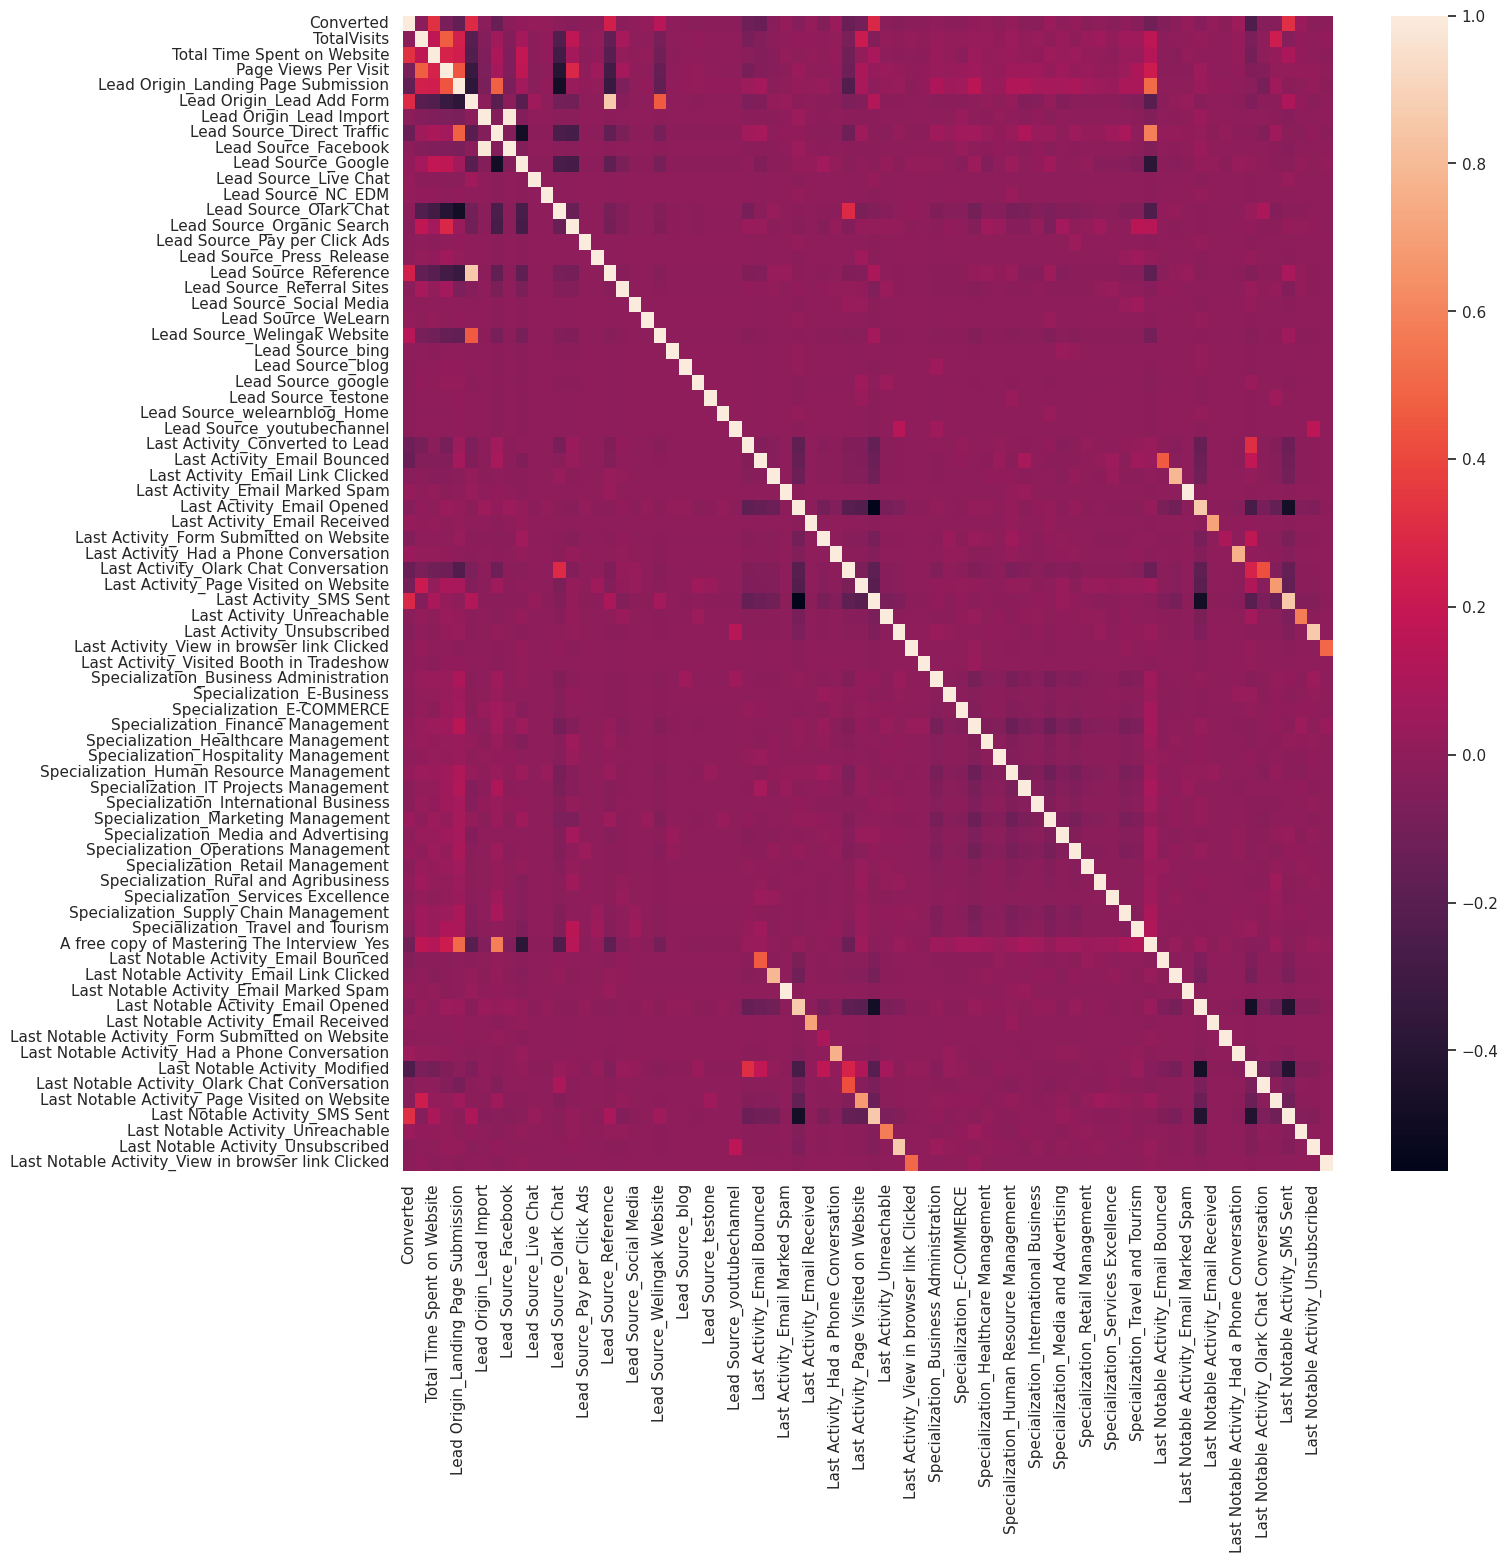

In [293]:
# Plotting Correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(leads_data.corr())
plt.show()

**Some Variables are found to be correlated, and some seems to negatively correlated, wheras majority are not**

# <span style="color:skyblue;">Step 3: Data Spliting into Training and Testing Datsets</span>

In [294]:
# Importing Train-Test Split from sklearn

from sklearn.model_selection import train_test_split


In [295]:
# Declaring 'X' , The Independent Variable Dataset

X = leads_data.drop(['Converted'], axis = 1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  ...  \
0                   0                      0  ...   
1                   0                      0  ...   
2                   0                      0  ...   
3                   0                      0  ...   
4                   1                      0  ...   

   Last Notable Activity_Email Received  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                       

In [296]:
# Declaring 'y' , the Dependent / target Variable
y = leads_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [297]:
# Spliting Data into 70:30 ratio.

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7 , test_size = 0.3, random_state = 100)

In [298]:
# Checking Shape of splitted Datasets

print("Shape of X_train",X_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)


Shape of X_train (5350, 73)
Shape of X_test (2293, 73)
Shape of y_train (5350,)
Shape of y_test (2293,)


**We have three variables ['TotalVisits','Total Time Spent on Website','Page Views Per Visit'] , that are scaled at different scales, we need to Scale them down for the sake of calculation and model building, we will use min_max_scaler**

In [299]:
# Importing MinMAxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

In [300]:
# Scaling the three numeric features present in the dataset X_train

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
9023     0.042553                     0.115317              0.109091   
32       0.028369                     0.098151              0.036364   
1095     0.014184                     0.237236              0.036364   
4082     0.007092                     0.129842              0.018182   
1248     0.014184                     0.658891              0.036364   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
9023                                    0                          0   
32                                      0                          0   
1095                                    1                          0   
4082                                    1                          0   
1248                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
9023                        0                           0   
32                          0                           0   
1095                        0                           0   
4082                        0                           1   
1248                        0                           1   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  ...  \
9023                     0                   0                      0  ...   
32                       0                   0                      0  ...   
1095                     0                   1                      0  ...   
4082                     0                   0                      0  ...   
1248                     0                   0                      0  ...   

      Last Notable Activity_Email Received  \
9023                                     0   
32                                       0   
1095                                     0   
4082                                     0   
1248                                     0   

      Last Notable Activity_Form Submitted on Website  \
9023                                                0   
32                                                  0   
1095                                                0   
4082                                                0   
1248                                                0   

      Last Notable Activity_Had a Phone Conversation  \
9023                                               0   
32                                                 0   
1095                                               0   
4082                                               0   
1248                                               0   

      Last Notable Activity_Modified  \
9023                               1   
32                                 1   
1095                               1   
4082                               1   
1248                               1   

      Last Notable Activity_Olark Chat Conversation  \
9023                                              0   
32                                                0   
1095                                              0   
4082                                              0   
1248                                              0   

      Last Notable Activity_Page Visited on Website  \
9023                                              0   
32                                                0   
1095                                              0   
4082                                              0   
1248                                              0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
9023                               0                                  0   
32                                 0                                  0   
1095                               0                                  0   
4082                               0                                  0   
1248                               0                                 

In [301]:
# Scaling the three numeric features present in the dataset X_test
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3879     0.007968                     0.171771              0.133333   
4168     0.011952                     0.199290              0.200000   
7510     0.007968                     0.103418              0.133333   
2935     0.015936                     0.730581              0.266667   
7245     0.043825                     0.849534              0.244667   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3879                                    1                          0   
4168                                    1                          0   
7510                                    1                          0   
2935                                    1                          0   
7245                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
3879                        0                           1   
4168                        0                           0   
7510                        0                           1   
2935                        0                           0   
7245                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  ...  \
3879                     0                   0                      0  ...   
4168                     0                   1                      0  ...   
7510                     0                   0                      0  ...   
2935                     0                   1                      0  ...   
7245                     0                   0                      0  ...   

      Last Notable Activity_Email Received  \
3879                                     0   
4168                                     0   
7510                                     0   
2935                                     0   
7245                                     0   

      Last Notable Activity_Form Submitted on Website  \
3879                                                0   
4168                                                0   
7510                                                0   
2935                                                0   
7245                                                0   

      Last Notable Activity_Had a Phone Conversation  \
3879                                               0   
4168                                               0   
7510                                               0   
2935                                               0   
7245                                               0   

      Last Notable Activity_Modified  \
3879                               1   
4168                               0   
7510                               0   
2935                               0   
7245                               0   

      Last Notable Activity_Olark Chat Conversation  \
3879                                              0   
4168                                              0   
7510                                              0   
2935                                              0   
7245                                              0   

      Last Notable Activity_Page Visited on Website  \
3879                                              0   
4168                                              0   
7510                                              0   
2935                                              0   
7245                                              0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3879                               0                                  0   
4168                               1                                  0   
7510                               1                                  0   
2935                               1                                  0   
7245                               1                                 

# <span style="color:skyblue;">Step 4: Building Model</span>

# <span style="color:skyblue;">Model 1</span>

In [302]:
# Importing LogisticRegressor from sklearn

from sklearn.linear_model import LogisticRegression

In [303]:
# nInstance of Logistic Regression
lgrg = LogisticRegression()

**We have arround 73 features, its quite a huge number, so we use RFE (Recursive Feature Selection) to select Optimum number of features.**

In [304]:
# importing RFE
from sklearn.feature_selection import RFE

In [305]:
# Instance of RFE and Fitting it on training data
rfe = RFE(estimator = lgrg, n_features_to_select = 20)
rfe = rfe.fit(X_train,y_train)

In [306]:
# Checking Which features have been selected by RFE
list(zip(X_train, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 51),
 ('Lead Source_Direct Traffic', False, 4),
 ('Lead Source_Facebook', False, 43),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_NC_EDM', False, 53),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Pay per Click Ads', False, 33),
 ('Lead Source_Press_Release', False, 15),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 5),
 ('Lead Source_Social Media', False, 46),
 ('Lead Source_WeLearn', False, 34),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 47),
 ('Lead Source_blog', False, 17),
 ('Lead Source_google', False, 3),
 ('Lead Source_testone', False, 30),
 ('Lead Source_welearnblog_Home', False, 28),
 ('Lead S

In [307]:
# collecting columns selected by rfe in a  list

rfe_col = X_train.columns[rfe.support_]

In [308]:
# selecting columns , that selected by rfe
X_train = X_train[rfe_col]

In [309]:
# importing stats, statsmodels and VIF .
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [310]:
# Fitting the logistic Regression model on X_train after adding a constant.

X_train_sm = sm.add_constant(X_train)
lgrg1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lgrg1.fit()

# checking Summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5329
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2557.0
Date:                Tue, 19 Dec 2023   Deviance:                       5114.0
Time:                        00:02:08   Pearson chi2:                 5.60e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3397
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.7027      0.155    -10.978      0.000      -2.007      -1.399
TotalVisits                                        4.0019      1.578      2.537      0.011       0.910       7.094
Total Time Spent on Website                        4.4769      0.165     27.130      0.000       4.154       4.800
Page Views Per Visit                              -3.9385      1.274     -3.092      0.002      -6.435      -1.442
Lead Origin_Lead Add Form                          2.5852      1.144      2.259      0.024       0.343       4.828
Lead Source_Olark Chat                             1.4963      0.129     11.616      0.000       1.244       1.749
Lead Source_Reference                              1.4281      1.164      1.227      0.220      -0.853       3.709
Lead Source_Welingak Website                       2.7051      1.350      2.004      0.045       0.060       5.351
Last Activity_Email Bounced                       -1.8497      0.373     -4.961      0.000      -2.581      -1.119
Last Activity_Email Opened                         1.0542      0.167      6.329      0.000       0.728       1.381
Last Activity_Email Received                      20.9124   1.25e+04      0.002      0.999   -2.45e+04    2.46e+04
Last Activity_Had a Phone Conversation             1.4921      0.835      1.786      0.074      -0.145       3.129
Last Activity_Olark Chat Conversation             -0.4034      0.220     -1.830      0.067      -0.835       0.029
Last Activity_SMS Sent                             1.0495      0.132      7.931      0.000       0.790       1.309
Last Notable Activity_Email Link Clicked          -0.6434      0.293     -2.197      0.028      -1.217      -0.070
Last Notable Activity_Email Opened                -1.1296      0.184     -6.136      0.000      -1.490      -0.769
Last Notable Activity_Had a Phone Conversation     1.6307      1.368      1.192      0.233      -1.051       4.312
Last Notable Activity_Modified                    -1.1742      0.121     -9.670      0.000      -1.412      -0.936
Last Notable Activity_Olark Chat Conversation     -0.8168      0.398     -2.053      0.040      -1.597      -0.037
Last Notable Activity_Unreachable                  1.8352      0.521      3.520      0.000       0.813       2.857
Last Notable Activity_Unsubscribed                -0.9123      0.517     -1.766      0.077      -1.925       0.100
==================================================================================================================
"""

**There are Six variables who's values are greater than 0.05 , Let's Check their VIFs once.**

In [311]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                        Lead Origin_Lead Add Form  69.78
5                            Lead Source_Reference  52.92
6                     Lead Source_Welingak Website  17.70
8                       Last Activity_Email Opened   8.67
14              Last Notable Activity_Email Opened   8.26
2                             Page Views Per Visit   4.34
0                                      TotalVisits   2.68
15  Last Notable Activity_Had a Phone Conversation   2.59
10          Last Activity_Had a Phone Conversation   2.59
12                          Last Activity_SMS Sent   2.24
16                  Last Notable Activity_Modified   2.24
1                      Total Time Spent on Website   2.18
11           Last Activity_Olark Chat Conversation   1.83
4                           Lead Source_Olark Chat   1.59
17   Last Notable Activity_Olark Chat Conversation   1.34
7                      Last Activity_Email Bounced   1.14
13        Last Notable Activity_Email Link Clicked   1.06
18               Last Notable Activity_Unreachable   1.02
19              Last Notable Activity_Unsubscribed   1.02
9                     Last Activity_Email Received   1.00

**As per standard , we need to check VIFs greater than 5, therefore we have four variables having VIF greater than 5.**
we will drop "*Lead Source_Reference*" as it has high p-value and VIF as well.

In [312]:
# Dropping 'Lead Source_Reference' from X_train
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

# <span style="color:skyblue;">Model 2</span>

In [313]:
# Refit the model with the new set of features

lgrg2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res2 = lgrg2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5330
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2557.6
Date:                Tue, 19 Dec 2023   Deviance:                       5115.2
Time:                        00:02:08   Pearson chi2:                 5.62e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3396
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.7023      0.155    -10.977      0.000      -2.006      -1.398
TotalVisits                                        3.9968      1.577      2.534      0.011       0.905       7.089
Total Time Spent on Website                        4.4760      0.165     27.126      0.000       4.153       4.799
Page Views Per Visit                              -3.9410      1.274     -3.094      0.002      -6.437      -1.445
Lead Origin_Lead Add Form                          3.9773      0.239     16.642      0.000       3.509       4.446
Lead Source_Olark Chat                             1.4950      0.129     11.602      0.000       1.242       1.748
Lead Source_Welingak Website                       1.3122      0.753      1.742      0.081      -0.164       2.788
Last Activity_Email Bounced                       -1.8501      0.373     -4.963      0.000      -2.581      -1.119
Last Activity_Email Opened                         1.0545      0.166      6.334      0.000       0.728       1.381
Last Activity_Email Received                      20.9121   1.25e+04      0.002      0.999   -2.45e+04    2.46e+04
Last Activity_Had a Phone Conversation             1.4908      0.835      1.785      0.074      -0.146       3.128
Last Activity_Olark Chat Conversation             -0.4039      0.220     -1.833      0.067      -0.836       0.028
Last Activity_SMS Sent                             1.0498      0.132      7.937      0.000       0.791       1.309
Last Notable Activity_Email Link Clicked          -0.6404      0.293     -2.189      0.029      -1.214      -0.067
Last Notable Activity_Email Opened                -1.1303      0.184     -6.143      0.000      -1.491      -0.770
Last Notable Activity_Had a Phone Conversation     1.6322      1.368      1.193      0.233      -1.049       4.313
Last Notable Activity_Modified                    -1.1728      0.121     -9.664      0.000      -1.411      -0.935
Last Notable Activity_Olark Chat Conversation     -0.8147      0.398     -2.049      0.041      -1.594      -0.035
Last Notable Activity_Unreachable                  1.8357      0.521      3.521      0.000       0.814       2.857
Last Notable Activity_Unsubscribed                -0.9118      0.517     -1.765      0.078      -1.924       0.101
==================================================================================================================
"""

In [314]:
# Checking VIF

# Make a VIF dataframe for all the variables present

vif2 = pd.DataFrame()
vif2['Features'] = X_train.columns
vif2['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif2['VIF'] = round(vif2['VIF'], 2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)
vif2

Features   VIF
7                       Last Activity_Email Opened  8.66
13              Last Notable Activity_Email Opened  8.26
2                             Page Views Per Visit  4.34
0                                      TotalVisits  2.68
14  Last Notable Activity_Had a Phone Conversation  2.59
9           Last Activity_Had a Phone Conversation  2.59
11                          Last Activity_SMS Sent  2.24
15                  Last Notable Activity_Modified  2.23
1                      Total Time Spent on Website  2.18
10           Last Activity_Olark Chat Conversation  1.83
3                        Lead Origin_Lead Add Form  1.65
4                           Lead Source_Olark Chat  1.59
16   Last Notable Activity_Olark Chat Conversation  1.34
5                     Lead Source_Welingak Website  1.32
6                      Last Activity_Email Bounced  1.14
12        Last Notable Activity_Email Link Clicked  1.06
17               Last Notable Activity_Unreachable  1.02
18              Last Notable Activity_Unsubscribed  1.02
8                     Last Activity_Email Received  1.00

**we will remove , 'Last_activity_Email_Received' as it is having highest p-value**

In [315]:
# Dropping 'Lead Source_Reference' from X_train
X_train.drop('Last Activity_Email Received', axis = 1, inplace = True)


# <span style="color:skyblue;">Model 3</span>

In [316]:
# Refit the model with the new set of features


lgrg3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res3 = lgrg3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5331
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2559.3
Date:                Tue, 19 Dec 2023   Deviance:                       5118.7
Time:                        00:02:09   Pearson chi2:                 5.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3391
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.6898      0.155    -10.924      0.000      -1.993      -1.387
TotalVisits                                        3.9908      1.578      2.529      0.011       0.898       7.084
Total Time Spent on Website                        4.4798      0.165     27.149      0.000       4.156       4.803
Page Views Per Visit                              -3.9442      1.274     -3.097      0.002      -6.440      -1.448
Lead Origin_Lead Add Form                          3.9772      0.239     16.642      0.000       3.509       4.446
Lead Source_Olark Chat                             1.4950      0.129     11.602      0.000       1.242       1.748
Lead Source_Welingak Website                       1.3129      0.753      1.743      0.081      -0.163       2.789
Last Activity_Email Bounced                       -1.8623      0.373     -4.996      0.000      -2.593      -1.132
Last Activity_Email Opened                         1.0443      0.166      6.281      0.000       0.718       1.370
Last Activity_Had a Phone Conversation             1.4807      0.835      1.773      0.076      -0.156       3.118
Last Activity_Olark Chat Conversation             -0.4139      0.220     -1.880      0.060      -0.845       0.018
Last Activity_SMS Sent                             1.0373      0.132      7.863      0.000       0.779       1.296
Last Notable Activity_Email Link Clicked          -0.6536      0.292     -2.235      0.025      -1.227      -0.081
Last Notable Activity_Email Opened                -1.1333      0.184     -6.162      0.000      -1.494      -0.773
Last Notable Activity_Had a Phone Conversation     1.6297      1.368      1.191      0.234      -1.052       4.311
Last Notable Activity_Modified                    -1.1758      0.121     -9.700      0.000      -1.413      -0.938
Last Notable Activity_Olark Chat Conversation     -0.8180      0.398     -2.057      0.040      -1.597      -0.039
Last Notable Activity_Unreachable                  1.8229      0.521      3.497      0.000       0.801       2.845
Last Notable Activity_Unsubscribed                -0.9250      0.517     -1.791      0.073      -1.938       0.087
==================================================================================================================
"""

**Dropping "Last Notable Activity_Had a Phone Conversation" as it is having highets p-value 0.234**

In [317]:
# Dropping "Last Notable Activity_Had a Phone Conversation" as it is having highets p-value
X_train.drop("Last Notable Activity_Had a Phone Conversation", axis=1, inplace = True)

# <span style="color:skyblue;">Model 4</span>

In [318]:
lgrg4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res4 = lgrg4.fit()
res4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5332
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2560.2
Date:                Tue, 19 Dec 2023   Deviance:                       5120.3
Time:                        00:02:09   Pearson chi2:                 5.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3389
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6805      0.154    -10.880      0.000      -1.983      -1.378
TotalVisits                                       3.9983      1.578      2.534      0.011       0.906       7.090
Total Time Spent on Website                       4.4790      0.165     27.145      0.000       4.156       4.802
Page Views Per Visit                             -3.9273      1.273     -3.085      0.002      -6.422      -1.432
Lead Origin_Lead Add Form                         3.9796      0.239     16.650      0.000       3.511       4.448
Lead Source_Olark Chat                            1.4956      0.129     11.605      0.000       1.243       1.748
Lead Source_Welingak Website                      1.3125      0.753      1.743      0.081      -0.164       2.789
Last Activity_Email Bounced                      -1.8644      0.373     -4.999      0.000      -2.595      -1.133
Last Activity_Email Opened                        1.0490      0.166      6.309      0.000       0.723       1.375
Last Activity_Had a Phone Conversation            2.1882      0.588      3.724      0.000       1.037       3.340
Last Activity_Olark Chat Conversation            -0.4089      0.220     -1.857      0.063      -0.841       0.023
Last Activity_SMS Sent                            1.0298      0.132      7.814      0.000       0.772       1.288
Last Notable Activity_Email Link Clicked         -0.6638      0.292     -2.271      0.023      -1.237      -0.091
Last Notable Activity_Email Opened               -1.1483      0.184     -6.256      0.000      -1.508      -0.789
Last Notable Activity_Modified                   -1.1908      0.121     -9.868      0.000      -1.427      -0.954
Last Notable Activity_Olark Chat Conversation    -0.8330      0.398     -2.096      0.036      -1.612      -0.054
Last Notable Activity_Unreachable                 1.8125      0.521      3.478      0.001       0.791       2.834
Last Notable Activity_Unsubscribed               -0.9354      0.517     -1.811      0.070      -1.948       0.077
=================================================================================================================
"""

**Dropping "Last Notable Activity_Unsubscribed" as it is having highest p-value 0.070**

In [319]:
# Dropping "Last Notable Activity_Unsubscribed" as it is having highets p-value
X_train.drop("Last Notable Activity_Unsubscribed", axis=1, inplace = True)

# <span style="color:skyblue;">Model 5</span>

In [320]:
lgrg5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res5 = lgrg5.fit()
res5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5333
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2562.0
Date:                Tue, 19 Dec 2023   Deviance:                       5124.0
Time:                        00:02:09   Pearson chi2:                 5.63e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3385
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7506      0.150    -11.648      0.000      -2.045      -1.456
TotalVisits                                       4.2089      1.580      2.664      0.008       1.113       7.305
Total Time Spent on Website                       4.4812      0.165     27.159      0.000       4.158       4.805
Page Views Per Visit                             -4.0754      1.271     -3.206      0.001      -6.567      -1.584
Lead Origin_Lead Add Form                         3.9772      0.239     16.641      0.000       3.509       4.446
Lead Source_Olark Chat                            1.4873      0.129     11.562      0.000       1.235       1.739
Lead Source_Welingak Website                      1.3108      0.753      1.740      0.082      -0.166       2.787
Last Activity_Email Bounced                      -1.8140      0.372     -4.881      0.000      -2.542      -1.086
Last Activity_Email Opened                        1.0801      0.166      6.514      0.000       0.755       1.405
Last Activity_Had a Phone Conversation            2.2363      0.586      3.815      0.000       1.087       3.385
Last Activity_Olark Chat Conversation            -0.3756      0.220     -1.709      0.087      -0.806       0.055
Last Activity_SMS Sent                            1.0945      0.128      8.584      0.000       0.845       1.344
Last Notable Activity_Email Link Clicked         -0.5926      0.290     -2.044      0.041      -1.161      -0.024
Last Notable Activity_Email Opened               -1.1074      0.182     -6.077      0.000      -1.465      -0.750
Last Notable Activity_Modified                   -1.1489      0.119     -9.692      0.000      -1.381      -0.917
Last Notable Activity_Olark Chat Conversation    -0.7939      0.397     -1.999      0.046      -1.572      -0.016
Last Notable Activity_Unreachable                 1.8845      0.520      3.625      0.000       0.866       2.903
=================================================================================================================
"""

** Dropping "Last Activity_Olark Chat Conversation" as it is having highets p-value 0.087**

In [321]:
# Dropping "Last Activity_Olark Chat Conversation" as it is having highets p-value
X_train.drop("Last Activity_Olark Chat Conversation", axis=1, inplace = True)

# <span style="color:skyblue;">Model 6</span>

In [322]:
lgrg6 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res6 = lgrg6.fit()
res6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5334
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2563.5
Date:                Tue, 19 Dec 2023   Deviance:                       5127.0
Time:                        00:02:09   Pearson chi2:                 5.64e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3381
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.8006      0.148    -12.137      0.000      -2.091      -1.510
TotalVisits                                       4.3237      1.583      2.731      0.006       1.220       7.427
Total Time Spent on Website                       4.4886      0.165     27.164      0.000       4.165       4.812
Page Views Per Visit                             -4.1589      1.273     -3.266      0.001      -6.654      -1.663
Lead Origin_Lead Add Form                         3.9803      0.239     16.640      0.000       3.511       4.449
Lead Source_Olark Chat                            1.4394      0.125     11.500      0.000       1.194       1.685
Lead Source_Welingak Website                      1.3069      0.753      1.735      0.083      -0.169       2.783
Last Activity_Email Bounced                      -1.7373      0.370     -4.696      0.000      -2.462      -1.012
Last Activity_Email Opened                        1.1804      0.156      7.561      0.000       0.874       1.486
Last Activity_Had a Phone Conversation            2.3058      0.586      3.933      0.000       1.157       3.455
Last Activity_SMS Sent                            1.1580      0.123      9.423      0.000       0.917       1.399
Last Notable Activity_Email Link Clicked         -0.5343      0.288     -1.852      0.064      -1.100       0.031
Last Notable Activity_Email Opened               -1.1522      0.181     -6.375      0.000      -1.506      -0.798
Last Notable Activity_Modified                   -1.1905      0.117    -10.211      0.000      -1.419      -0.962
Last Notable Activity_Olark Chat Conversation    -1.0996      0.354     -3.109      0.002      -1.793      -0.406
Last Notable Activity_Unreachable                 1.9364      0.519      3.731      0.000       0.919       2.954
=================================================================================================================
"""

**Dropping "Lead Source_Welingak Website" as it is having highets p-value 0.083**

In [323]:
# Dropping "Lead Source_Welingak Website" as it is having highets p-value
X_train.drop("Lead Source_Welingak Website", axis=1, inplace = True)

# <span style="color:skyblue;">Model 7</span>

In [324]:
lgrg7 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res7 = lgrg7.fit()
res7.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5335
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2565.6
Date:                Tue, 19 Dec 2023   Deviance:                       5131.2
Time:                        00:02:09   Pearson chi2:                 5.69e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3376
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.8022      0.148    -12.151      0.000      -2.093      -1.511
TotalVisits                                       4.3289      1.584      2.733      0.006       1.225       7.433
Total Time Spent on Website                       4.4890      0.165     27.164      0.000       4.165       4.813
Page Views Per Visit                             -4.1620      1.273     -3.268      0.001      -6.658      -1.666
Lead Origin_Lead Add Form                         4.1759      0.229     18.244      0.000       3.727       4.625
Lead Source_Olark Chat                            1.4400      0.125     11.502      0.000       1.195       1.685
Last Activity_Email Bounced                      -1.7106      0.365     -4.691      0.000      -2.425      -0.996
Last Activity_Email Opened                        1.1788      0.156      7.539      0.000       0.872       1.485
Last Activity_Had a Phone Conversation            2.3079      0.586      3.936      0.000       1.159       3.457
Last Activity_SMS Sent                            1.1608      0.123      9.449      0.000       0.920       1.402
Last Notable Activity_Email Link Clicked         -0.5347      0.288     -1.853      0.064      -1.100       0.031
Last Notable Activity_Email Opened               -1.1487      0.181     -6.353      0.000      -1.503      -0.794
Last Notable Activity_Modified                   -1.1917      0.116    -10.235      0.000      -1.420      -0.964
Last Notable Activity_Olark Chat Conversation    -1.1035      0.354     -3.113      0.002      -1.798      -0.409
Last Notable Activity_Unreachable                 1.9365      0.519      3.730      0.000       0.919       2.954
=================================================================================================================
"""

**Dropping "Last Notable Activity_Email Link Clicked" as it is having highets p-value 0.064**

In [325]:
# Dropping "Last Notable Activity_Email Link Clicked" as it is having highets p-value
X_train.drop("Last Notable Activity_Email Link Clicked", axis=1, inplace = True)

# <span style="color:skyblue;">Model 8</span>

In [326]:
lgrg8 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res8 = lgrg8.fit()
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5336
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.4
Date:                Tue, 19 Dec 2023   Deviance:                       5134.7
Time:                        00:02:09   Pearson chi2:                 5.68e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3371
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.9002      0.139    -13.636      0.000      -2.173      -1.627
TotalVisits                                       4.4806      1.581      2.834      0.005       1.382       7.580
Total Time Spent on Website                       4.4859      0.165     27.164      0.000       4.162       4.810
Page Views Per Visit                             -4.2163      1.272     -3.314      0.001      -6.710      -1.722
Lead Origin_Lead Add Form                         4.1547      0.228     18.191      0.000       3.707       4.602
Lead Source_Olark Chat                            1.4376      0.125     11.492      0.000       1.192       1.683
Last Activity_Email Bounced                      -1.6453      0.362     -4.544      0.000      -2.355      -0.936
Last Activity_Email Opened                        1.2111      0.156      7.777      0.000       0.906       1.516
Last Activity_Had a Phone Conversation            2.3699      0.584      4.060      0.000       1.226       3.514
Last Activity_SMS Sent                            1.2462      0.114     10.894      0.000       1.022       1.470
Last Notable Activity_Email Opened               -1.0829      0.177     -6.107      0.000      -1.430      -0.735
Last Notable Activity_Modified                   -1.1251      0.111    -10.152      0.000      -1.342      -0.908
Last Notable Activity_Olark Chat Conversation    -1.0051      0.351     -2.867      0.004      -1.692      -0.318
Last Notable Activity_Unreachable                 2.0336      0.517      3.936      0.000       1.021       3.046
=================================================================================================================
"""

In [327]:
X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

**VIF Check**

In [328]:
# Creating a Datframe fro VIF values f each feature left and printing them in decending order
vif3 = pd.DataFrame()
vif3["Features"] = X_train.columns
vif3["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif3["VIF"] = round(vif3["VIF"], 2)
vif3 = vif3.sort_values(by = "VIF", ascending = False)
vif3

Features   VIF
6                      Last Activity_Email Opened  7.95
9              Last Notable Activity_Email Opened  7.89
2                            Page Views Per Visit  4.21
0                                     TotalVisits  2.68
1                     Total Time Spent on Website  2.14
8                          Last Activity_SMS Sent  2.07
10                 Last Notable Activity_Modified  1.89
4                          Lead Source_Olark Chat  1.36
3                       Lead Origin_Lead Add Form  1.31
5                     Last Activity_Email Bounced  1.11
11  Last Notable Activity_Olark Chat Conversation  1.06
12              Last Notable Activity_Unreachable  1.02
7          Last Activity_Had a Phone Conversation  1.01

**we are observing VIF for "Last Activity_Email Opened" is 7.95 which is more than standard VIF = 5, Therefore we will remove the feature and check VIF again.**

In [329]:
# Droping "Last Activity_Email Opened" from X_train.
X_train.drop("Last Activity_Email Opened", axis =1, inplace = True)

# <span style="color:skyblue;">Model 9</span>

In [330]:
lgrg9 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res9 = lgrg9.fit()
res9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5337
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.1
Date:                Tue, 19 Dec 2023   Deviance:                       5194.2
Time:                        00:02:09   Pearson chi2:                 5.65e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3297
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7369      0.135    -12.848      0.000      -2.002      -1.472
TotalVisits                                       3.8659      1.552      2.492      0.013       0.825       6.907
Total Time Spent on Website                       4.4978      0.164     27.392      0.000       4.176       4.820
Page Views Per Visit                             -3.6158      1.255     -2.881      0.004      -6.076      -1.156
Lead Origin_Lead Add Form                         4.2418      0.228     18.566      0.000       3.794       4.690
Lead Source_Olark Chat                            1.4480      0.124     11.686      0.000       1.205       1.691
Last Activity_Email Bounced                      -1.9234      0.358     -5.376      0.000      -2.625      -1.222
Last Activity_Had a Phone Conversation            2.1073      0.578      3.649      0.000       0.975       3.239
Last Activity_SMS Sent                            1.0254      0.108      9.455      0.000       0.813       1.238
Last Notable Activity_Email Opened               -0.0547      0.120     -0.456      0.648      -0.290       0.180
Last Notable Activity_Modified                   -0.9441      0.106     -8.867      0.000      -1.153      -0.735
Last Notable Activity_Olark Chat Conversation    -1.1806      0.349     -3.378      0.001      -1.865      -0.496
Last Notable Activity_Unreachable                 1.8515      0.516      3.588      0.000       0.840       2.863
=================================================================================================================
"""

In [331]:
left_cols = X_train.columns
left_cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

# <span style="color:skyblue;">Final VIF</span>



In [332]:
vif4 = pd.DataFrame()
vif4["Features"] = X_train.columns
vif4["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif4["VIF"] = round(vif4["VIF"], 2)
vif4 = vif4.sort_values(by = "VIF", ascending = False)
vif4

Features   VIF
2                            Page Views Per Visit  4.18
0                                     TotalVisits  2.68
1                     Total Time Spent on Website  2.12
8              Last Notable Activity_Email Opened  2.06
7                          Last Activity_SMS Sent  2.00
9                  Last Notable Activity_Modified  1.67
4                          Lead Source_Olark Chat  1.35
3                       Lead Origin_Lead Add Form  1.29
5                     Last Activity_Email Bounced  1.08
10  Last Notable Activity_Olark Chat Conversation  1.06
11              Last Notable Activity_Unreachable  1.02
6          Last Activity_Had a Phone Conversation  1.01

**Now all our VIFs are below 5, which accepted, now we will evaluate our Model**

# <span style="color:skyblue;">Step 5: Evaluating Model</span>

In [333]:
# Predicting Probabilities on training set X_train

y_train_pred = res9.predict(sm.add_constant(X_train))
y_train_pred

9023    0.083760
32      0.094371
1095    0.155688
4082    0.105706
1248    0.774044
          ...   
93      0.454686
4822    0.857656
7202    0.835323
8400    0.074199
6840    0.676228
Length: 5350, dtype: float64

In [334]:
# Selecting first 10 records for evaluation
y_train_pred[:10]

9023    0.083760
32      0.094371
1095    0.155688
4082    0.105706
1248    0.774044
3837    0.971537
1655    0.786574
659     0.414925
7640    0.427262
4577    0.752902
dtype: float64

In [335]:
# Reshaping the y_pred into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08375955, 0.09437068, 0.15568839, 0.10570581, 0.77404422,
       0.97153698, 0.78657443, 0.41492505, 0.4272619 , 0.75290224])

# <span style="color:skyblue;">Creating a DataFrame with actual Conversion Flag and Predicted Probabilities</span>

In [336]:
# Creating a dataframe with actual conversion flag and prediced probabilities by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_rate(in %age)':(y_train_pred)*100})
y_train_pred_final

Converted  Conversion_rate(in %age)
0             0                  8.375955
1             0                  9.437068
2             0                 15.568839
3             0                 10.570581
4             0                 77.404422
...         ...                       ...
5345          0                 45.468575
5346          1                 85.765577
5347          1                 83.532330
5348          0                  7.419934
5349          1                 67.622780

[5350 rows x 2 columns]

**Creating new column 'Predicted' with 1 if conversion_rate > 50 else 0**

In [337]:

y_train_pred_final['Predicted'] = y_train_pred_final["Conversion_rate(in %age)"].map(lambda x: 1 if x > 50 else 0)

# Let's see the head
y_train_pred_final

Converted  Conversion_rate(in %age)  Predicted
0             0                  8.375955          0
1             0                  9.437068          0
2             0                 15.568839          0
3             0                 10.570581          0
4             0                 77.404422          1
...         ...                       ...        ...
5345          0                 45.468575          0
5346          1                 85.765577          1
5347          1                 83.532330          1
5348          0                  7.419934          0
5349          1                 67.622780          1

[5350 rows x 3 columns]

**Now we will Import the "metrics" Library from for model-evaluation**

In [338]:
# importing" metrics" library
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix


In [339]:
# Creating the Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2544  462]
 [ 753 1591]]


In [340]:
# Checking overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7728971962616823


In [341]:
# Evaluating other metrics 

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [342]:
# Calculating the 'sensitivity'

print("Model-Sensitivity",TP/(TP+FN))
print("\n")
# Calculating the 'specificity'

print("Model-Specifity",TN/(TN+FP))

Model-Sensitivity 0.6787542662116041


Model-Specifity 0.846307385229541


<span style="font-size:18px;color:skyblue;">Finding the Optimal Cutoff</span>


50% was arbitary, to loosely check performance of model. Now we will optimise the threshold to get results. we will plot an ROC and observe AOC.


In [343]:
# Creating function to draw ROC curve.

def draw_roc(actual, prob):
    fpr, tpr, thresholds = metrics.roc_curve( actual, prob,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, prob )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')      # or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [344]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final["Conversion_rate(in %age)"], 
                                         drop_intermediate=False)

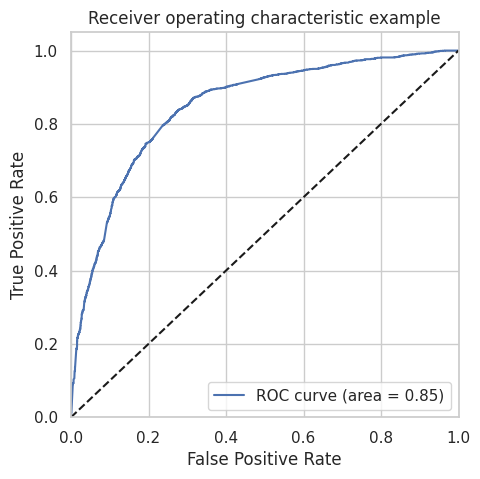

In [345]:
# Calling the draw_roc function

draw_roc(y_train_pred_final.Converted, y_train_pred_final["Conversion_rate(in %age)"])

**Area Under The Curve ( AUC ) of ROC is 0.85. So it seems a good model, Now we will check the Sensitivity and Specificity tradeoff to find optimal CutOff**


In [346]:

# we will create a different column for different probability cutoff. 

numbers = [float(x)/10 for x in range(10)]
for num in numbers:
    y_train_pred_final[num]= y_train_pred_final["Conversion_rate(in %age)"].map(lambda x: 1 if x > num*100 else 0)
y_train_pred_final.head()

Converted  Conversion_rate(in %age)  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0                  8.375955          0    1    0    0    0    0   
1          0                  9.437068          0    1    0    0    0    0   
2          0                 15.568839          0    1    1    0    0    0   
3          0                 10.570581          0    1    1    0    0    0   
4          0                 77.404422          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    1    1    1    0    0

In [347]:
# we will create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

numbers = [float(x)/10 for x in range(10)]
for num in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[num] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[num] =[ num ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.438131     1.000000     0.000000
0.1   0.1  0.536636     0.981229     0.189953
0.2   0.2  0.670654     0.934300     0.465070
0.3   0.3  0.759439     0.877133     0.667665
0.4   0.4  0.774766     0.804608     0.751497
0.5   0.5  0.772897     0.678754     0.846307
0.6   0.6  0.760935     0.600683     0.885895
0.7   0.7  0.722056     0.459898     0.926480
0.8   0.8  0.688785     0.342577     0.958749
0.9   0.9  0.642804     0.204778     0.984365


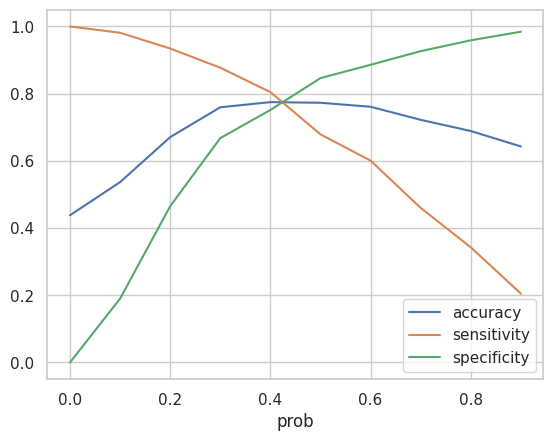

In [348]:
# Plotting Graph for CutOff

sns.set(style="whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

**As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 42% as our cutoff now.**

In [349]:

y_train_pred_final['final_predicted'] = y_train_pred_final['Conversion_rate(in %age)'].map( lambda x: 1 if x > 42 else 0)

y_train_pred_final.head()

Converted  Conversion_rate(in %age)  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0                  8.375955          0    1    0    0    0    0   
1          0                  9.437068          0    1    0    0    0    0   
2          0                 15.568839          0    1    1    0    0    0   
3          0                 10.570581          0    1    1    0    0    0   
4          0                 77.404422          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    1    1    1    0    0                1

In [350]:
# checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7760747663551402

In [351]:
# Creating the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2378,  628],
       [ 570, 1774]])

In [352]:
# Evaluating Other Metrics Again

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#  'Sensitivity'

print("Model-Sensitivity",TP/(TP+FN))

print("\n")
#  'Specificity'

print("Model-Specificity",TN/(TN+FP))

Model-Sensitivity 0.7568259385665529


Model-Specificity 0.791084497671324


**Both metrices and Cutoff points are Acceptable.**

# <span style="color:skyblue;">Step 6: Making Prediction on Test-Set</span>

In [353]:
# Selecting the columns in X_train for X_test as well

X_test = X_test[rfe_col]
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3879     0.007968                     0.171771              0.133333   
4168     0.011952                     0.199290              0.200000   
7510     0.007968                     0.103418              0.133333   
2935     0.015936                     0.730581              0.266667   
7245     0.043825                     0.849534              0.244667   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
3879                          0                       0   
4168                          0                       0   
7510                          0                       0   
2935                          0                       0   
7245                          0                       0   

      Lead Source_Reference  Lead Source_Welingak Website  \
3879                      0                             0   
4168                      0                             0   
7510                      0                             0   
2935                      0                             0   
7245                      0                             0   

      Last Activity_Email Bounced  Last Activity_Email Opened  \
3879                            0                           1   
4168                            0                           0   
7510                            0                           0   
2935                            0                           0   
7245                            0                           0   

      Last Activity_Email Received  Last Activity_Had a Phone Conversation  \
3879                             0                                       0   
4168                             0                                       0   
7510                             0                                       0   
2935                             0                                       0   
7245                             0                                       0   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
3879                                      0                       0   
4168                                      0                       1   
7510                                      0                       1   
2935                                      0                       1   
7245                                      0                       1   

      Last Notable Activity_Email Link Clicked  \
3879                                         0   
4168                                         0   
7510                                         0   
2935                                         0   
7245                                         0   

      Last Notable Activity_Email Opened  \
3879                                   0   
4168                                   0   
7510                                   0   
2935                                   0   
7245                                   0   

      Last Notable Activity_Had a Phone Conversation  \
3879                                               0   
4168                                               0   
7510                                               0   
2935                                               0   
7245                                               0   

      Last Notable Activity_Modified  \
3879                               1   
4168                               0   
7510                               0   
2935                               0   
7245                               0   

      Last Notable Activity_Olark Chat Conversation  \
3879                                              0   
4168                                              0   
7510                                              0   
2935                                              0   
7245                                              0   

      Last Notable Activity_Unreachable  Last Notable Activity_Unsubscribed  
3879       

In [354]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[rfe_col])

X_test_sm

const  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3879    1.0     0.007968                     0.171771              0.133333   
4168    1.0     0.011952                     0.199290              0.200000   
7510    1.0     0.007968                     0.103418              0.133333   
2935    1.0     0.015936                     0.730581              0.266667   
7245    1.0     0.043825                     0.849534              0.244667   
...     ...          ...                          ...                   ...   
1213    1.0     0.011952                     0.066134              0.200000   
3605    1.0     0.007968                     0.079450              0.133333   
6718    1.0     0.019920                     0.038615              0.333333   
4451    1.0     0.019920                     0.110963              0.333333   
9200    1.0     0.019920                     0.136707              0.333333   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
3879                          0                       0   
4168                          0                       0   
7510                          0                       0   
2935                          0                       0   
7245                          0                       0   
...                         ...                     ...   
1213                          0                       0   
3605                          0                       0   
6718                          0                       0   
4451                          0                       0   
9200                          0                       0   

      Lead Source_Reference  Lead Source_Welingak Website  \
3879                      0                             0   
4168                      0                             0   
7510                      0                             0   
2935                      0                             0   
7245                      0                             0   
...                     ...                           ...   
1213                      0                             0   
3605                      0                             0   
6718                      0                             0   
4451                      0                             0   
9200                      0                             0   

      Last Activity_Email Bounced  Last Activity_Email Opened  ...  \
3879                            0                           1  ...   
4168                            0                           0  ...   
7510                            0                           0  ...   
2935                            0                           0  ...   
7245                            0                           0  ...   
...                           ...                         ...  ...   
1213                            0                           0  ...   
3605                            0                           0  ...   
6718                            1                           0  ...   
4451                            0                           0  ...   
9200                            0                           0  ...   

      Last Activity_Had a Phone Conversation  \
3879                                       0   
4168                                       0   
7510                                       0   
2935                                       0   
7245                                       0   
...                                      ...   
1213                                       0   
3605                                       0   
6718                                       0   
4451                                       0   
9200                                       0   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
3879                                      0                       0   
4168                                      0            

In [355]:
# Retaining only those Columns in X_test which we were left with X_train.

X_test = X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable']]



In [356]:
X_test.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [357]:
X_test

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3879     0.007968                     0.171771              0.133333   
4168     0.011952                     0.199290              0.200000   
7510     0.007968                     0.103418              0.133333   
2935     0.015936                     0.730581              0.266667   
7245     0.043825                     0.849534              0.244667   
...           ...                          ...                   ...   
1213     0.011952                     0.066134              0.200000   
3605     0.007968                     0.079450              0.133333   
6718     0.019920                     0.038615              0.333333   
4451     0.019920                     0.110963              0.333333   
9200     0.019920                     0.136707              0.333333   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
3879                          0                       0   
4168                          0                       0   
7510                          0                       0   
2935                          0                       0   
7245                          0                       0   
...                         ...                     ...   
1213                          0                       0   
3605                          0                       0   
6718                          0                       0   
4451                          0                       0   
9200                          0                       0   

      Last Activity_Email Bounced  Last Activity_Had a Phone Conversation  \
3879                            0                                       0   
4168                            0                                       0   
7510                            0                                       0   
2935                            0                                       0   
7245                            0                                       0   
...                           ...                                     ...   
1213                            0                                       0   
3605                            0                                       0   
6718                            1                                       0   
4451                            0                                       0   
9200                            0                                       0   

      Last Activity_SMS Sent  Last Notable Activity_Email Opened  \
3879                       0                                   0   
4168                       1                                   0   
7510                       1                                   0   
2935                       1                                   0   
7245                       1                                   0   
...                      ...                                 ...   
1213                       1                                   0   
3605                       0                                   0   
6718                       0                                   0   
4451                       1                                   0   
9200                       0                                   0   

      Last Notable Activity_Modified  \
3879                               1   
4168                               0   
7510                               0   
2935                               0   
7245                               0   
...                              ...   
1213                               0   
3605                               1   
6718                               0   
4451                               0   
9200                               1   

      Last Notable Activity_Olark Chat Conversation  \
3879                                              0   
4168                                              0   
7510                                        

In [358]:
# Making Predictions on Test Dataset, and storing in y_test_pred. 

y_test_pred = res9.predict(sm.add_constant(X_test))

y_test_pred

3879    0.086292
4168    0.379401
7510    0.332334
2935    0.841826
7245    0.916389
          ...   
1213    0.251431
3605    0.058690
6718    0.009806
4451    0.207399
9200    0.039375
Length: 2293, dtype: float64

In [359]:
# Converting y_pred to a dataframe

y_pred_df = pd.DataFrame(y_test_pred)

y_pred_df

0
3879  0.086292
4168  0.379401
7510  0.332334
2935  0.841826
7245  0.916389
...        ...
1213  0.251431
3605  0.058690
6718  0.009806
4451  0.207399
9200  0.039375

[2293 rows x 1 columns]

In [360]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [361]:
# Removing Index from both y_pred_df and y_test_df , to join them.

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [362]:
# Joining the two Dataframes y_pred_df and y_test_df

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [363]:
# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0          0  0.086292
1          1  0.379401
2          0  0.332334
3          1  0.841826
4          1  0.916389

In [364]:
# Renaming Column names

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

y_pred_final.head()

Converted  Conversion_Prob
0          0         0.086292
1          1         0.379401
2          0         0.332334
3          1         0.841826
4          1         0.916389

In [365]:
# Making predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          0         0.086292                0
1          1         0.379401                0
2          0         0.332334                0
3          1         0.841826                1
4          1         0.916389                1

**Overall Accuracy on Test set**

In [366]:
# overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7688617531617967

In [367]:
# Creating Confusion Matrix

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1158,  195],
       [ 335,  605]])

In [368]:
# Calculating Sensitivity and Specificity

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Calculating the 'sensitivity'

print("Model-Sensitivity",TP / float(TP+FN))

print("\n")
# Calculating the 'specificity'

print("Model-Specificity",TN / float(TN+FP))

Model-Sensitivity 0.6436170212765957


Model-Specificity 0.8558758314855875


**Precision-Recall View**

Let's now also build the training model using the precision-recall view

In [369]:

#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2544,  462],
       [ 753, 1591]])

In [370]:
# Calculating Precision and Recall

TP = confusion[1,1]  # True Positive
TN = confusion[0,0]  # True Negative
FP = confusion[0,1]  # False Positive
FN = confusion[1,0]  # False Negative


# Calculating Precision

Precision = TP / (TP + FP)

# confusion[1,1]/(confusion[0,1]+confusion[1,1])
# 0.8057809330628803
# Calculating Recall

Recall = TP / (TP + FN)

# confusion[1,1]/(confusion[1,0]+confusion[1,1])

print("Precision : ",Precision)
print("\n")
print("Recall : ",Recall)

Precision :  0.77496346809547


Recall :  0.6787542662116041


<span style="font-size:16px;color:skyblue;">Inspecting Precision and recall tradeoffs</span>

In [371]:
# Importing the Precision recall curve library

y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 5345    0
 5346    1
 5347    1
 5348    0
 5349    1
 Name: Converted, Length: 5350, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 5345    0
 5346    1
 5347    1
 5348    0
 5349    1
 Name: Predicted, Length: 5350, dtype: int64)

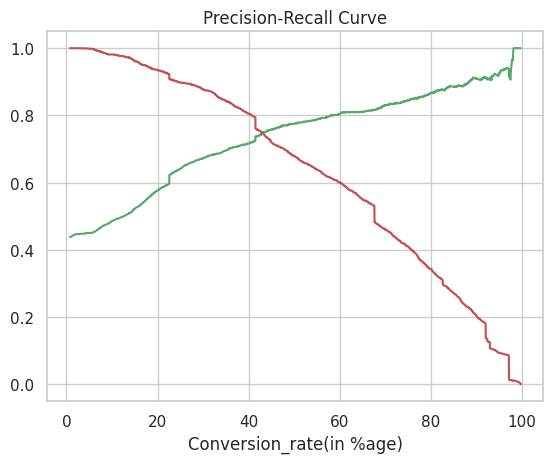

In [377]:
# Drawing Precision and Recall Curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final["Conversion_rate(in %age)"])  # p: Precision , r: Recall 
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Conversion_rate(in %age)")
plt.title("Precision-Recall Curve")

plt.show()

**So here also we have got Optimal CutOff at 42% or probability = 0.42**

In [373]:
y_train_pred_final['final_predicted'] = y_train_pred_final["Conversion_rate(in %age)"].map(lambda x: 1 if x > 42 else 0)

y_train_pred_final.head()

Converted  Conversion_rate(in %age)  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0                  8.375955          0    1    0    0    0    0   
1          0                  9.437068          0    1    0    0    0    0   
2          0                 15.568839          0    1    1    0    0    0   
3          0                 10.570581          0    1    1    0    0    0   
4          0                 77.404422          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    1    1    1    0    0                1

In [374]:
# checking the `accuracy` on y_train_pred

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7760747663551402

In [375]:
# creating the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2378,  628],
       [ 570, 1774]])

In [376]:
# Calculating Precision and Recall 

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Calculating precision

Precision2 = TP/(TP+FP)

# Calculating Recall
Recall2 = TP/(TP+FN)

print("Precision2 : ",Precision2)
print("\n")
print("Recall2 : ",Recall2)

Precision2 :  0.7385512073272273


Recall2 :  0.7568259385665529


**We have Acceptable Cutoff Points and Precison and Recall values as well.**